### Analysis for Wristband Project

Aug/14/2023


## Import Dependency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Import Data

Load Data into an Array List

For reference, the csv is a 21 extended object given by
['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'Instruction', 'Signal_Time', 'Batch_time','X','Y']

In [2]:
# subject name to get data path

subject_name = "Francis"
data_path = "data/" + subject_name
section_numbers = 4

open_data = []
close_data = []
rest_data = []

for i in range (section_numbers):
    section_path = data_path + "/Section_Number_" + str(i)
    open_df = pd.read_csv(section_path + "/open.csv")
    open_data.append(open_df.values)
    close_df = pd.read_csv(section_path + "/close.csv")
    close_data.append(close_df.values)
    rest_df = pd.read_csv(section_path + "/rest.csv")
    rest_data.append(rest_df.values)

Checking if everything makes sense at this point

In [3]:
print(len(rest_data))

4


In [4]:
print(type(open_data))

<class 'list'>


In [5]:
print(np.shape(open_data[2]))

(2008, 21)


In [6]:
print(np.shape(rest_data[1]))

(2008, 21)


Combine all the things together

In [7]:
all_list = [open_data, close_data, rest_data]

Check if things are working:

In [8]:
print(len(all_list))

3


## Visualize Raw Data

Here, we visualize all the data all at once.

For reference, instruction = 0 open, = 1 close, = 2 rest

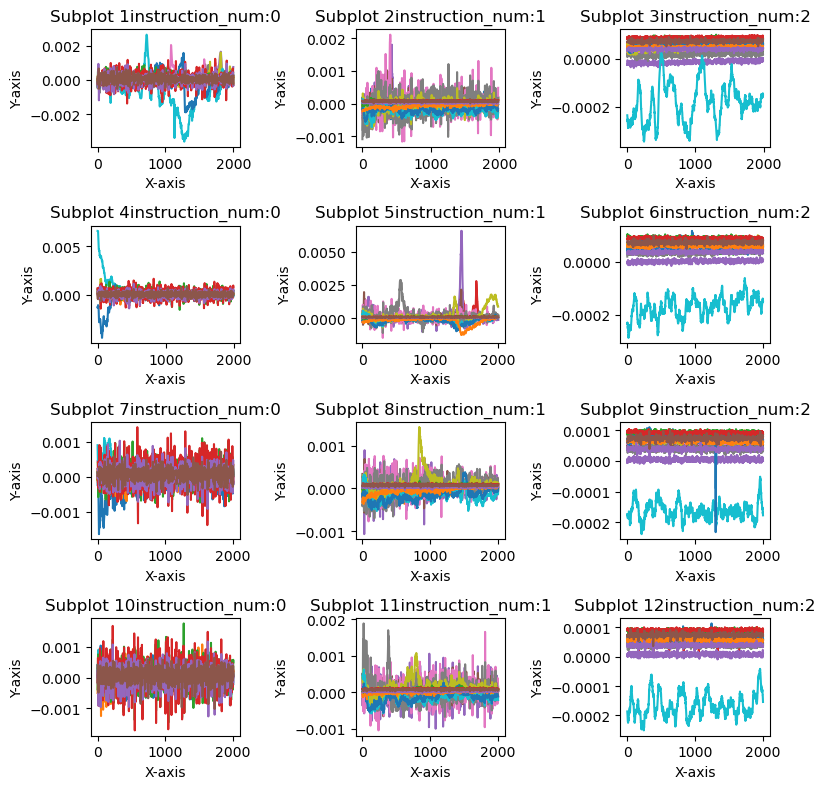

In [9]:
# Create a figure and an array of subplots
fig, axes = plt.subplots(nrows=section_numbers, ncols=3, figsize=(8, 8))

# fig is the figure object
# axes is an enumerator object that goes through each sub-figure.

i = 0
# we use section number to indicate section
for section_num, row in enumerate(axes):
    # we use instruction to indicate open, close or rest.
    for instruction_num, ax in enumerate(row):
        i = i + 1
        # get the particular section data
        plot_data = all_list[instruction_num][section_num]
        # initialize x-axis with exactly length of the data
        x = np.arange(0, len(plot_data[:,0]))
        # plot every channels
        for line_number in range(16):
            ax.plot(x, plot_data[:,line_number])
        ax.set_title(f'Subplot {i}' + 'instruction_num:' + str(instruction_num))
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with all subplots
plt.show()

Seems quite weird, further analysis at a section data

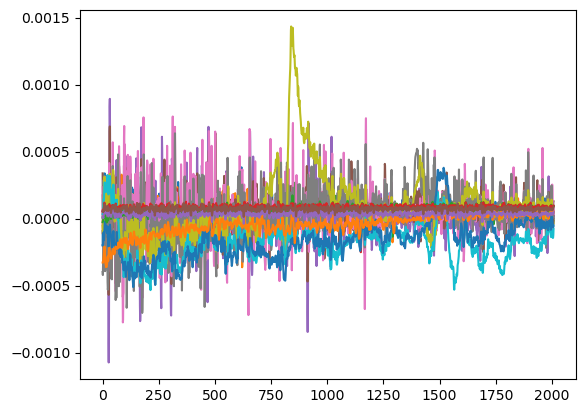

In [10]:
this_data = all_list[1][2]
x = np.arange(0, len(this_data[:,0]))
for line_number in range(16):
    plt.plot(x, this_data[:,line_number])

Plot each channel individually to see what is happening

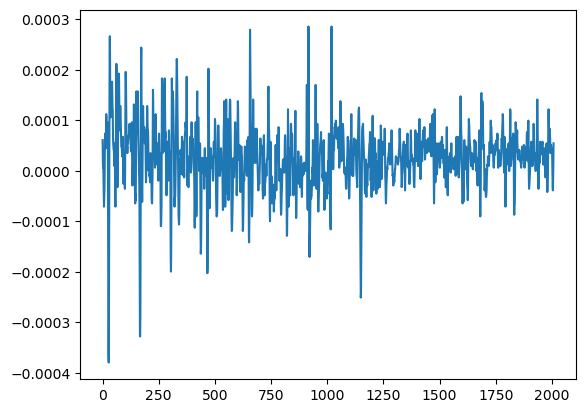

In [11]:
this_data = all_list[1][2]
x = np.arange(0, len(this_data[:,0]))
plt.plot(x, this_data[:,3])

Plot Another Channel

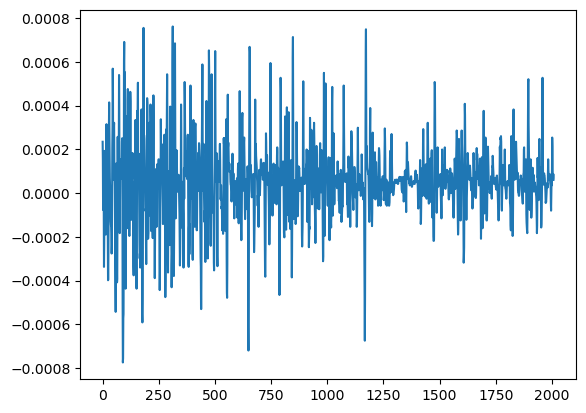

In [12]:
this_data = all_list[1][2]
x = np.arange(0, len(this_data[:,0]))
plt.plot(x, this_data[:,6])

Try to find the channel that is extremely large

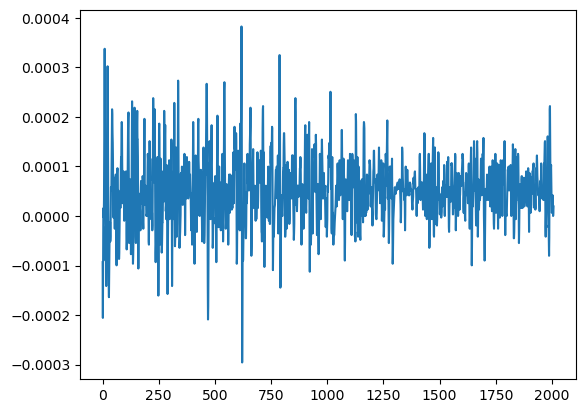

In [13]:
plt.plot(x, this_data[:,0])

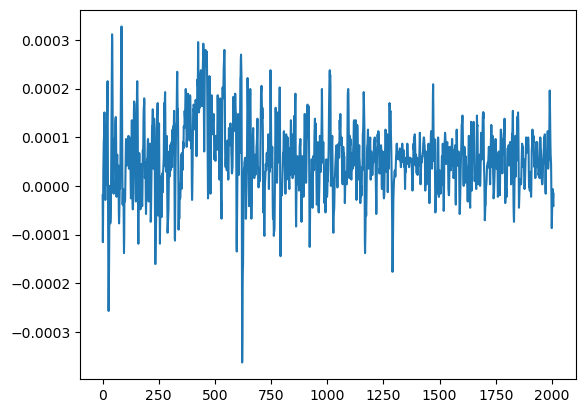

In [14]:
plt.plot(x, this_data[:,1])

# Some errors happen here. TO DO

##  Supervised Machine Learning

# Train a Linear Regression Model (Implementation of Adrian's Idea)

First we need to combine all the open data

In [33]:
print(len(open_data[2]))
open_data_combined = np.concatenate(open_data, axis=0)
print(np.shape(open_data_combined))

2008
(8008, 21)


The same procedure for close data and rest data

In [34]:
close_data_combined = np.concatenate(close_data, axis=0)
rest_data_combined = np.concatenate(rest_data, axis=0)

Make Y targets for open X data

In [35]:
print(len(open_data_combined))
Y_open = np.ones(len(open_data_combined))
print(len(Y_open))

8008
8008


Make Y targets for rest X data

In [36]:
print(len(rest_data_combined))
Y_rest = np.zeros(len(rest_data_combined))
print(len(Y_rest))

8000
8000


Make Y targets for close X data

In [37]:
print((len(close_data_combined)))
Y_close = np.ones(len(close_data_combined)) * - 1
print(len(Y_close))

8000
8000


See if things are working

In [38]:
print("Y open", Y_open)
print("Y rest", Y_rest)
print("Y close", Y_close)

Y open [1. 1. 1. ... 1. 1. 1.]
Y rest [0. 0. 0. ... 0. 0. 0.]
Y close [-1. -1. -1. ... -1. -1. -1.]


Combine them according to Adrian's idea

In [39]:
Y_Total = np.concatenate([Y_open, Y_rest, Y_close])

# See if it is in the right dimension

print(Y_Total)
print(len(Y_Total))
print(np.shape(Y_Total))

[ 1.  1.  1. ... -1. -1. -1.]
24008
(24008,)


Get X labels for supervised machine learning

In [40]:
X_Total = np.concatenate([open_data_combined, rest_data_combined, close_data_combined])

# See if it is in the right dimension

print(X_Total)
print(len(X_Total))
print(np.shape(X_Total))

[[ 5.46237388e-05  1.09247478e-04 -3.21316134e-06 ...  3.01033258e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.81974203e-05  1.02821163e-04 -9.63948332e-06 ...  3.01033258e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.49842591e-05  1.06034320e-04 -1.28526453e-05 ...  3.01033258e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.73510707e-04  2.05642325e-04  8.35421961e-05 ...  4.60018206e+01
   0.00000000e+00  0.00000000e+00]
 [ 1.38165924e-04  1.67084392e-04  8.03290313e-05 ...  4.60018206e+01
   0.00000000e+00  0.00000000e+00]
 [ 8.35421961e-05  7.71158666e-05  4.17710980e-05 ...  4.60018206e+01
   0.00000000e+00  0.00000000e+00]]
24008
(24008, 21)


Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression().fit(X_Total, Y_Total)

# save model as a .pkl file
with open('Trained_Models/' + subject_name + '_linear_regression_model.pkl', 'wb') as f:
    pickle.dump(linear_regression_model, f)

# Offline Control Through Linear Regression

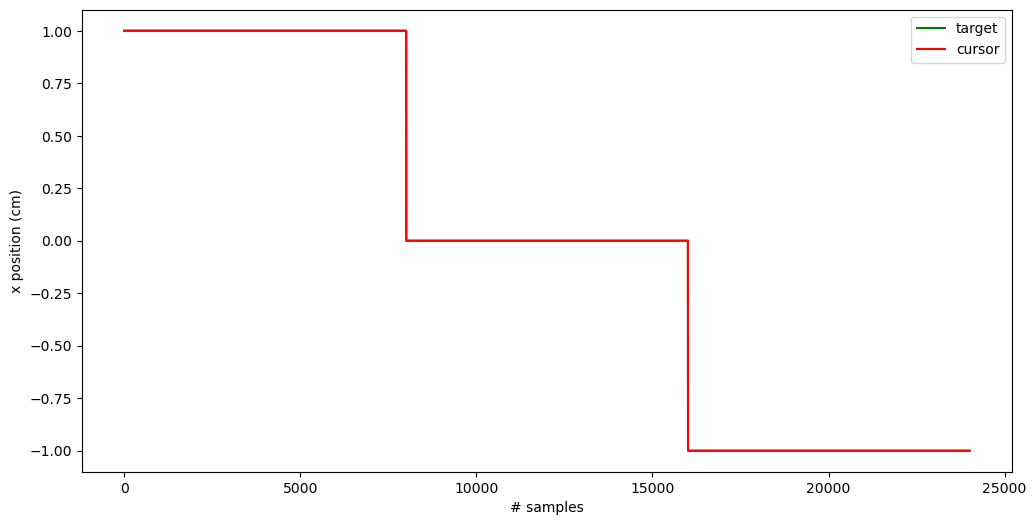

In [45]:
y_pred = linear_regression_model.predict(X_Total)
x = np.arange(0, len(Y_Total))

plt.figure(figsize=(12, 6))
plt.plot(x, Y_Total, color="green")
plt.plot(x, y_pred, color="red")
plt.xlabel('# samples')
plt.ylabel('x position (cm)')
plt.legend(['target', 'cursor'])

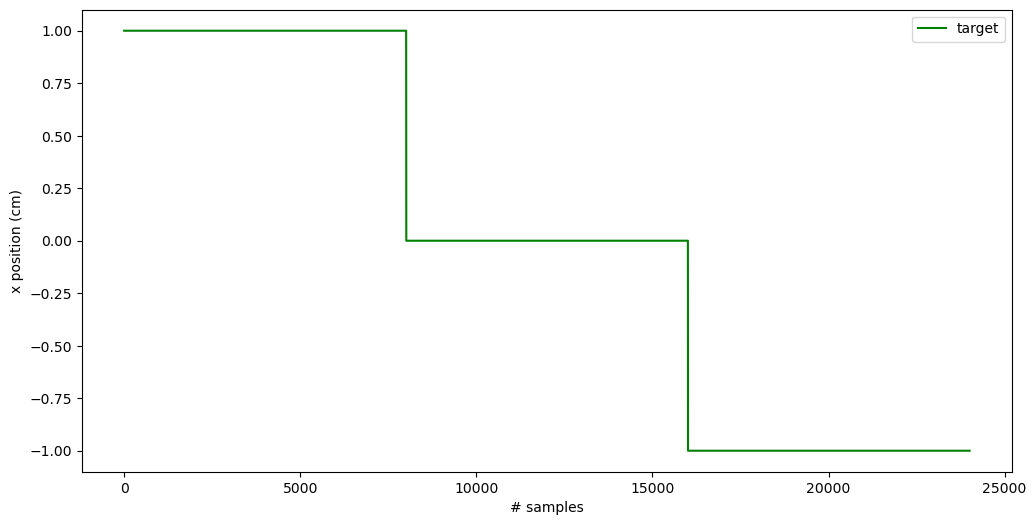

In [46]:
y_pred = linear_regression_model.predict(X_Total)
x = np.arange(0, len(Y_Total))

plt.figure(figsize=(12, 6))
plt.plot(x, Y_Total, color="green")
# plt.plot(x, y_pred, color="red")
plt.xlabel('# samples')
plt.ylabel('x position (cm)')
plt.legend(['target', 'cursor'])

In [47]:
print(linear_regression_model)

LinearRegression()
